# Introdcution

Original assignment text will be shown in ***bold and italic*** for easy reading 

# Assignment 1A: Anscombe's quartet

***Start by downloading these four datasets: Data 1, Data 2, Data 3, and Data 4. The format is .tsv, which stands for tab separated values. Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values. ***


In [1]:
import numpy as np
import urllib2
from StringIO import StringIO
%matplotlib inline

In [2]:
#Downloading datasets and save them to dictionary
data_dict = {}

for number in range(1,5):
    
    data_file = "data_file" + str(number)
    
    current_response = urllib2.urlopen('https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data{}.tsv'.format(number))
    current_array = np.genfromtxt(StringIO(current_response.read()), delimiter='\t')
    
    
    data_dict["Array {}".format(number)] = current_array

***Using the numpy function mean, calculate the mean of both x-values and y-values for each dataset. Use python string formatting to print precisely two decimal places of these results to the output cell.***

In [3]:
for key, value in data_dict.items():
    
    all_means = np.mean(data_dict[key], axis=0)
    current_x_mean, current_y_mean = all_means[0], all_means[1]
    print("The mean values of x and y in {} are {:.2f} and {:.2f} respectively.".format(key, current_x_mean, current_y_mean)) 

The mean values of x and y in Array 1 are 9.00 and 7.50 respectively.
The mean values of x and y in Array 2 are 9.00 and 7.50 respectively.
The mean values of x and y in Array 3 are 9.00 and 7.50 respectively.
The mean values of x and y in Array 4 are 9.00 and 7.50 respectively.


***Now calculate the variance for all of the various sets of xx- and yy-values (to three decimal places).***

In [4]:
for key, value in data_dict.items():
    
    all_var = np.var(data_dict[key], axis=0)
    current_x_var, current_y_var = all_var[0], all_var[1]
    print("The variance values of x and y in {} are {:.3f} and {:.3f} respectively.".format(key, current_x_var, current_y_var))

The variance values of x and y in Array 1 are 10.000 and 3.752 respectively.
The variance values of x and y in Array 2 are 10.000 and 3.752 respectively.
The variance values of x and y in Array 3 are 10.000 and 3.748 respectively.
The variance values of x and y in Array 4 are 10.000 and 3.748 respectively.


***Use numpy to calculate the Pearson correlation between x- and y-values for all four data sets (also to three decimal places).***

In [5]:
for key, value in data_dict.items():
    
    x = data_dict[key][:,0]
    y = data_dict[key][:,1]
    pearsons_cof = np.corrcoef(x, y)
    print("The Pearsons Correlation coefficient for {} is {:.3f}".format(key, pearsons_cof[0,1]))

The Pearsons Correlation coefficient for Array 1 is 0.816
The Pearsons Correlation coefficient for Array 2 is 0.816
The Pearsons Correlation coefficient for Array 3 is 0.816
The Pearsons Correlation coefficient for Array 4 is 0.817


***The next step is use linear regression to fit a straight line $f(x)=ax+bf(x)=ax+b$ through each dataset and report a and b (to two decimal places). An easy way to fit a straight line in Python is using scipy's linregress.***

In [6]:
from scipy import stats

for key, value in data_dict.items():
    
    x = data_dict[key][:,0]
    y = data_dict[key][:,1]
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    
    print("The linear equation describing {} is y = {:.2f}x + {:.2f}".format(key, slope, intercept))

The linear equation describing Array 1 is y = 0.50x + 3.00
The linear equation describing Array 2 is y = 0.50x + 3.00
The linear equation describing Array 3 is y = 0.50x + 3.00
The linear equation describing Array 4 is y = 0.50x + 3.00


***Finally, it's time to plot the four datasets using matplotlib.pyplot. Use a two-by-two subplot to put all of the plots nicely in a grid and use the same x and y range for all four plots. And include the linear fit in all four plots.***

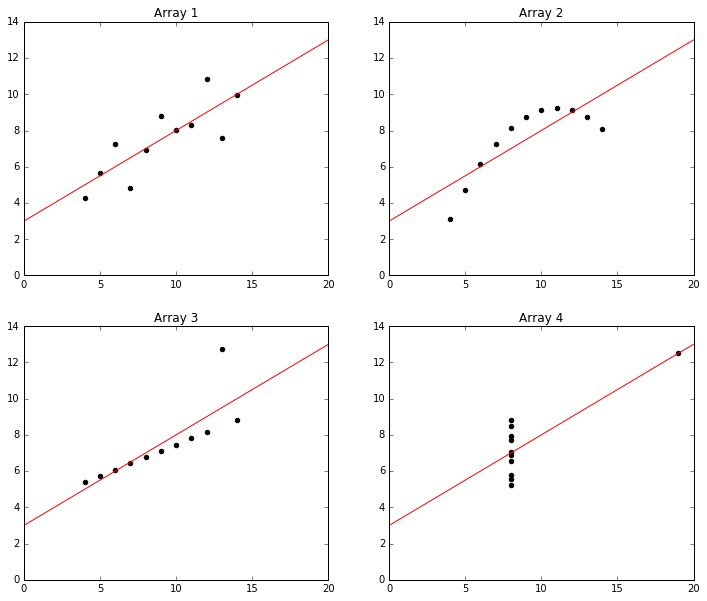

In [7]:
import matplotlib.pyplot as plt

subplot_counter = 1

plt.figure(figsize = (12,10)) # size must be defined before plotting

for key, value in data_dict.items():
    
    # Calculate values
    x = data_dict[key][:,0]
    y = data_dict[key][:,1]
    m, b = np.polyfit(x, y, 1) # fit a 1 degree polynomial 
    regression_line_limits = np.array([0,20]) # limits to extend regression lines
    
    # Plotting
    plt.subplot(2, 2, subplot_counter)
    plt.scatter(x, y, c='black') # plot the data
    plt.plot(regression_line_limits, m*regression_line_limits + b, '-', c="r") # plot the regression line
    plt.xlim(0,20)
    plt.ylim(0,14)
    plt.title(key)
    
    subplot_counter += 1

plt.show()

***Explain - in your own words - what you think my point with this exercise is.***

The point of this exercise is to show how basic statistic properties can sometimes do a poor job at describing datasets. Looking at properties such as the mean, variance, Person's coefficent and the linear equations describing the data could lead one to conclude that the datasets are all the same or the very least extremely similar.
However, it isn't until we actually plot our data that we see that the datasets are in fact very different from each other. This emphasizes the importance of visualizing the data we are analyzing.

# Assignment 1B: KNN

***The goal of this exercise is to create a useful real-world version of the example on pp153 in DSFS. We know from Week 3's exercises that the focus crimes PROSTITUTION, DRUG/NARCOTIC and DRIVING UNDER THE INFLUENCE tend to be concentrated in certain neighborhoods, so we focus on those crime types since they will make the most sense a KNN - map.***

In [8]:
import numpy as np
import pandas as pd
from __future__ import division
import matplotlib.pyplot as plt

In [9]:
#Getting the data
df = pd.read_csv("SFPD_Incidents_-_from_1_January_2003.csv")
df = df.dropna() #dropping empty values

#Isolating the important data
columns = ["Category", "Date", "Time", "PdDistrict", 'X', 'Y'] #selecting needed values
df = df[columns]
focuscrimes = sorted(['PROSTITUTION', 'DRUG/NARCOTIC', 'DRIVING UNDER THE INFLUENCE']) 
focuscrimes_df = df[df['Category'].isin(focuscrimes)] #Creating a new data frame only containing data from the 3 focuscrimes
focuscrimes_df.head()

,Category,Date,Time,PdDistrict,X,Y
11,DRUG/NARCOTIC,02/01/2015,14:00,MISSION,-122.413354,37.769075
12,DRUG/NARCOTIC,02/01/2015,14:00,MISSION,-122.413354,37.769075
31,DRUG/NARCOTIC,02/01/2015,16:56,MISSION,-122.419520,37.764229
41,DRUG/NARCOTIC,02/01/2015,17:02,MISSION,-122.419828,37.766674
61,DRIVING UNDER THE INFLUENCE,02/01/2015,18:39,NORTHERN,-122.420692,37.790577


***Begin by using geoplotlib to plot all incidents of the three crime types on their own map using geoplotlib.kde(). This will give you an idea of how the varioius crimes are distributed across the city.***

In [10]:
import geoplotlib
from geoplotlib.utils import BoundingBox 
from scipy import stats

focuscrimes_df = focuscrimes_df[(np.abs(stats.zscore(focuscrimes_df[['X','Y']])) < 3).all(axis=1)] # remove obs that are not within 3 standard deviations

#extracting data for plotting from the dataframe
latitute_list = focuscrimes_df['Y']
longitude_list = focuscrimes_df['X']

geo_data_for_plotting = {"lat": latitute_list,
                         "lon": longitude_list}

#finding the extremums for the bounding box
max_lat, min_lat = max(latitute_list), min(latitute_list) 
max_lon, min_lon = max(longitude_list), min(longitude_list) 

#Creating bounding box for the plot
bbox = BoundingBox(north=max_lat, west=min_lon, south=min_lat, east=max_lon)
geoplotlib.set_bbox(bbox)

#plotting the heat map
geoplotlib.kde(geo_data_for_plotting, bw=6, alpha=160, cut_below=1e-3)
geoplotlib.inline()

('smallest non-zero count', 9.9511598222816013e-10)
('max count:', 94.60290537662226)


*** Next, it's time to set up your model based on the actual data. You can use the code supplied in the book or try out scikit-learn's KNeighborsClassifier.***



***You can make the dataset 'balanced' by grabbing an equal number of examples from each crime category. ***


In [11]:
from collections import Counter

focuscrimes_list = Counter(focuscrimes_df['Category']).most_common()	# grab counts of all focuscrimes
least_common_crime = focuscrimes_list[-1]								# grab the least common crime as baseline 
least_common_crime


('DRIVING UNDER THE INFLUENCE', 5114)

In [12]:
# initialize empty balanced dataframe
balanced_focuscrimes_df = pd.DataFrame(columns=columns) 

# appending to balanced dataframe 
for crime in focuscrimes:
    
    current_df = df[df['Category'] == crime]						 # grab current crime
    current_sample = current_df.sample(n=least_common_crime[-1])	 # randomly sample according to the least common
    
    balanced_focuscrimes_df = pd.concat([balanced_focuscrimes_df, current_sample])

***Since the algorithm classifies each point according to it's neighbors, what could a consequence of this imbalance in the number of examples from each class mean for your map?***

It could mean that some of the low represented examples will be wrongly classified as one of the strongly classified examples.

***How do you expect that*** (grabbing an equal number of examples from each crime category) ***will change the KNN result?***

If there are drastically more datapoints of one crime there is a high risk that it becomes the majority of nearest neighbours to most of the new data points, and this way skew the predictions. So by making the dataset balanced it is a fair game for each of the three crimes.

And by picking out the data points from the dataset at random, the distribution is ensured to assemble the thruth.

***In which situations is the balanced map useful - and when is the map that data in proportion to occurrences useful?***

In the [Accuracy Paradox](https://en.wikipedia.org/wiki/Accuracy_paradox) it is stated that if a dataset is very unbalanced it is possible to get a very accurate prediction engine by every time just "predicting" that the outcome is the most likely outcome. This method - even though it has a high accuracy - cannot be used for anything, because it will never be able to predict the unlikely cases. A good example of this is when predicting whether or not a person has cancer. It is very unlikely that the person has cancer but it is critical that it gets detected if he/she is sick. In such a case it would make sense to balance the dataset. You will trade the accuracy (you will get more false positive) for more true positive.

In cases where the data set is more balanced it is best to use the real proportioned dataset.

In [13]:
# Make the column categorical in pandas, so it can be converted to numerical values
balanced_focuscrimes_df['Category'] = balanced_focuscrimes_df['Category'].astype('category')
balanced_focuscrimes_df['Class'] = balanced_focuscrimes_df['Category'].cat.codes

balanced_focuscrimes_df.tail()

,Category,Date,Time,PdDistrict,X,Y,Class
378173,PROSTITUTION,06/11/2007,07:20,BAYVIEW,-122.397560,37.767032,2
1287576,PROSTITUTION,12/17/2008,23:08,MISSION,-122.416230,37.763634,2
732654,PROSTITUTION,10/18/2012,01:30,MISSION,-122.415922,37.759612,2
1193453,PROSTITUTION,02/18/2010,19:24,MISSION,-122.414845,37.760500,2
1782540,PROSTITUTION,01/03/2003,17:55,MISSION,-122.416230,37.763634,2


* **Now create an approximately square grid of point that runs over SF. You get to decide the grid-size, but I recommend somewhere between $50 \times 50$ and $100 \times 100$ points. I recommend plotting using geoplotlib.dot().**

In [14]:
# Initialize map location #
bbox = BoundingBox(north=max_lat, west=min_lon, south=min_lat, east=max_lon)
geoplotlib.set_bbox(bbox)

#Choose colors for plot
colors = ["blue", "red", "green"]

for idx, crime in enumerate(focuscrimes):
    
    latitute_list = balanced_focuscrimes_df[balanced_focuscrimes_df['Category'] == crime]['Y']
    longitude_list = balanced_focuscrimes_df[balanced_focuscrimes_df['Category'] == crime]['X']
    
    geo_data_for_plotting = {"lat": latitute_list,
                             "lon": longitude_list}

    geoplotlib.dot(geo_data_for_plotting, color=colors[idx], point_size=2)



geoplotlib.inline()
print "Blue: Driving Under the Influence     Red: Drug/Narcotic     Green: Prostitution"

Blue: Driving Under the Influence     Red: Drug/Narcotic     Green: Prostitution


In [15]:
# Model setup

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric

X = balanced_focuscrimes_df[['X', 'Y']]						 # feature values
y = balanced_focuscrimes_df['Class']						 # target

knn = KNeighborsClassifier()								 # initialize model
knn.fit(X, y)												 # fit to our data

# Initialize map location
max_lat, min_lat = max(latitute_list), min(latitute_list) 
max_lon, min_lon = max(longitude_list), min(longitude_list) 

bbox = BoundingBox(north=max_lat, west=min_lon, south=min_lat, east=max_lon)
geoplotlib.set_bbox(bbox)

In [33]:
# Outlier detection for regularization
 
all_distances = knn.kneighbors(X=X, n_neighbors=30, return_distance=True)	 # grab all distances
mean_dist = np.mean(all_distances[0])										 # their mean
dist_std = np.std(all_distances[0])											 # and their std
outlier_dist = mean_dist + dist_std*2										 # distance value over stds

In [35]:
# Plotting

# Initialize map location
bbox = BoundingBox(north=max_lat, west=min_lon, south=min_lat, east=max_lon)
geoplotlib.set_bbox(bbox)

colors = ["blue", "red", "green"] # DUI, DRUGS, PROSTITUTION

lat_distance = max_lat - min_lat # vertical span of grid
lon_distance = max_lon - min_lon # horzontal span of grid 

lat_step = lat_distance/100 # vertical spacing between points
lon_step = lon_distance/100 # horizontal spacing between points


# Initialize dictionaries for different crimes
geo_data_for_plotting_dui = {"lat": [],
                             "lon": []}

geo_data_for_plotting_drg = {"lat": [],
                             "lon": []}

geo_data_for_plotting_prs = {"lat": [],
                             "lon": []}

# for each point in our 100x100 grid
for i in np.arange(min_lat, max_lat, lat_step): # iterate through LAT
    for j in np.arange(min_lon-0.03, max_lon+0.01, lon_step): # iterate through LON
        
        # grab the current grid point and its distances to its NN
        current_pred = np.array([[j, i]])
        current_distances = knn.kneighbors(X=current_pred, n_neighbors=30, return_distance=True)[0]        
        
        
        # check if it's in a sparse area or not
        if np.mean(current_distances) > outlier_dist:
            current_pred = ''
        else:
            current_pred = knn.predict(current_pred)     
        
        if current_pred == 0:							# DUI
            geo_data_for_plotting_dui['lat'].append(i)
            geo_data_for_plotting_dui['lon'].append(j)
        elif current_pred == 1:							# DRUGS
            geo_data_for_plotting_drg['lat'].append(i)
            geo_data_for_plotting_drg['lon'].append(j)
        elif current_pred == 2:							# PROSTITUTION
            geo_data_for_plotting_prs['lat'].append(i)
            geo_data_for_plotting_prs['lon'].append(j)

geoplotlib.dot(geo_data_for_plotting_dui, color="blue", point_size=1.5)
geoplotlib.dot(geo_data_for_plotting_drg, color="red", point_size=1.5)
geoplotlib.dot(geo_data_for_plotting_prs, color="green", point_size=1.5)
            
geoplotlib.inline()

In [40]:
#Creating a function that takes af list of values of k and plotting the different maps
def KNN_SF_plot(k_values):
    for k in k_values:
        # Outlier detection for regularization
        KNN = KNeighborsClassifier(n_neighbors = k)
        KNN = KNN.fit(X, y)
        

        # Plotting
        colors = ["blue", "red", "green"] # DUI, DRUGS, PROSTITUTION

        lat_distance = max_lat - min_lat # vertical span of grid
        lon_distance = max_lon - min_lon # horzontal span of grid 

        lat_step = lat_distance/100 # vertical spacing between points
        lon_step = lon_distance/100 # horizontal spacing between points


        # Initialize dictionaries for different crimes
        geo_data_for_plotting_dui = {"lat": [],
                                     "lon": []}

        geo_data_for_plotting_drg = {"lat": [],
                                     "lon": []}

        geo_data_for_plotting_prs = {"lat": [],
                                     "lon": []}

        # for each point in our 100x100 grid
        for i in np.arange(min_lat, max_lat, lat_step): # iterate through LAT
            for j in np.arange(min_lon-0.03, max_lon+0.01, lon_step): # iterate through LON

                # grab the current grid point and its distances to its NN
                current_pred = np.array([[j, i]])
                
                current_pred = KNN.predict(current_pred)     

                if current_pred == 0:							# DUI
                    geo_data_for_plotting_dui['lat'].append(i)
                    geo_data_for_plotting_dui['lon'].append(j)
                elif current_pred == 1:							# DRUGS
                    geo_data_for_plotting_drg['lat'].append(i)
                    geo_data_for_plotting_drg['lon'].append(j)
                elif current_pred == 2:							# PROSTITUTION
                    geo_data_for_plotting_prs['lat'].append(i)
                    geo_data_for_plotting_prs['lon'].append(j)

        geoplotlib.dot(geo_data_for_plotting_dui, color="blue", point_size=2)
        geoplotlib.dot(geo_data_for_plotting_drg, color="red", point_size=2)
        geoplotlib.dot(geo_data_for_plotting_prs, color="green", point_size=2)
        geoplotlib.inline()
    

#running the function with k = [5, 10, 30]    
KNN_SF_plot([5, 10, 30])

In [28]:
all_distances[0]

array([[  0.00000000e+00,   2.42581465e-11,   2.42581465e-11,
          5.27287501e-04,   5.27287501e-04],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   4.63651567e-04,   1.03960828e-03,
          1.03960828e-03,   1.03960828e-03],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]])